Notebook to identify the changes of direction per player

In [189]:

from pathlib import Path
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, degrees, atan ,atan2
import matplotlib.pyplot as plt


In [2]:
# define the path to the parquet files containing floodlight data: velocity
xy_path = Path("floodlight_parquets/xy_HT1")

In [3]:
# read the velocity data
xy_df = pl.read_parquet(xy_path)

In [4]:
xy_df

C. Coosemans_x,C. Coosemans_y,Amuzu_x,Amuzu_y,M. Rits_x,M. Rits_y,T. Leoni_x,T. Leoni_y,K. Dolberg_x,K. Dolberg_y,K. Sardella_x,K. Sardella_y,A. Dreyer_x,A. Dreyer_y,L. Dendoncker_x,L. Dendoncker_y,J. Simić_x,J. Simić_y,Amando Lapage_x,Amando Lapage_y,Ali Maamar_x,Ali Maamar_y,L. Vázquez_x,L. Vázquez_y,Y. Verschaeren_x,Y. Verschaeren_y,N. Engwanda_x,N. Engwanda_y,Mads Kikkenborg_x,Mads Kikkenborg_y,S. Edozie_x,S. Edozie_y,Thorgan Hazard_x,Thorgan Hazard_y,T. Degreef_x,T. Degreef_y,Thomas Foket_x,Thomas Foket_y,Timon Vanhoutte_x,Timon Vanhoutte_y,Anas Tajaouart_x,Anas Tajaouart_y
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
-46.38,-0.06,-0.57,9.02,-12.86,-10.79,-11.02,5.16,-8.04,-3.84,-19.56,-25.26,-8.72,-22.04,-21.03,-7.13,-23.0,-14.83,-21.15,1.56,-19.85,7.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-46.36,-0.06,-0.56,8.96,-12.85,-10.81,-11.06,5.15,-7.99,-3.91,-19.56,-25.25,-8.69,-22.04,-21.04,-7.14,-23.02,-14.83,-21.16,1.56,-19.84,7.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-46.35,-0.08,-0.55,8.9,-12.84,-10.82,-11.1,5.15,-7.94,-3.98,-19.56,-25.24,-8.67,-22.04,-21.05,-7.15,-23.03,-14.84,-21.18,1.55,-19.83,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-46.34,-0.1,-0.53,8.83,-12.85,-10.84,-11.14,5.15,-7.89,-4.06,-19.57,-25.23,-8.64,-22.04,-21.06,-7.17,-23.05,-14.84,-21.19,1.54,-19.82,7.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-46.32,-0.1,-0.5,8.75,-12.85,-10.85,-11.18,5.16,-7.84,-4.13,-19.57,-25.22,-8.63,-22.04,-21.07,-7.19,-23.06,-14.84,-21.21,1.53,-19.81,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-19.59,-8.61,19.71,21.62,15.03,20.27,0.48,9.98,18.87,19.47,-2.01,-9.16,15.57,13.18,0.45,9.08,-2.49,-8.64,-0.86,12.13,-0.25,20.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-19.62,-8.59,19.71,21.62,15.0,20.21,0.48,9.96,18.87,19.45,-2.02,-9.17,15.57,13.17,0.44,9.07,-2.49,-8.64,-0.85,12.09,-0.24,20.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-19.66,-8.57,19.71,21.62,14.96,20.14,0.49,9.95,18.87,19.42,-2.03,-9.18,15.57,13.16,0.44,9.05,-2.49,-8.64,-0.84,12.04,-0.23,20.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# loop over player XY values
# store as tuple
# get angle changes,
# get some sort of cutoff in angle changes

In [6]:
x = xy_df.get_column("Amuzu_x").to_list()
y = xy_df.get_column("Amuzu_y").to_list()

In [170]:
print(min(x))
print(max(x))
print(min(y))
print(max(y))

-43.17
50.33
-32.25
34.55


In [136]:
y

[9.02,
 8.96,
 8.9,
 8.83,
 8.75,
 8.66,
 8.58,
 8.49,
 8.4,
 8.3,
 8.2,
 8.09,
 7.99,
 7.88,
 7.76,
 7.63,
 7.5,
 7.38,
 7.25,
 7.12,
 6.99,
 6.86,
 6.73,
 6.6,
 6.46,
 6.33,
 6.19,
 6.06,
 5.92,
 5.78,
 5.64,
 5.51,
 5.37,
 5.23,
 5.09,
 4.95,
 4.8,
 4.65,
 4.5,
 4.35,
 4.2,
 4.06,
 3.91,
 3.77,
 3.63,
 3.5,
 3.37,
 3.25,
 3.14,
 3.04,
 2.95,
 2.87,
 2.79,
 2.72,
 2.66,
 2.61,
 2.55,
 2.5,
 2.45,
 2.4,
 2.36,
 2.3,
 2.25,
 2.18,
 2.11,
 2.04,
 1.96,
 1.86,
 1.76,
 1.65,
 1.53,
 1.41,
 1.28,
 1.14,
 1.0,
 0.84,
 0.68,
 0.52,
 0.35,
 0.17,
 -0.02,
 -0.21,
 -0.4,
 -0.6,
 -0.8,
 -1.01,
 -1.22,
 -1.43,
 -1.65,
 -1.86,
 -2.08,
 -2.31,
 -2.52,
 -2.75,
 -2.97,
 -3.2,
 -3.42,
 -3.64,
 -3.87,
 -4.09,
 -4.3,
 -4.52,
 -4.73,
 -4.94,
 -5.15,
 -5.36,
 -5.57,
 -5.77,
 -5.97,
 -6.17,
 -6.37,
 -6.55,
 -6.74,
 -6.93,
 -7.11,
 -7.29,
 -7.47,
 -7.65,
 -7.81,
 -7.98,
 -8.13,
 -8.29,
 -8.43,
 -8.58,
 -8.72,
 -8.85,
 -8.98,
 -9.1,
 -9.22,
 -9.33,
 -9.44,
 -9.55,
 -9.65,
 -9.75,
 -9.85,
 -9.93,
 -10.01,
 -1

Kai et al 2021: A new approach to quantify angles and time of changes-of-direction during soccer matches

In [ ]:
delta_t = 0.04

In [ ]:
d_list = [] # store direction of speed

for i in range(len(x)): 
    if i>0 and i<len(x)-1:
        x1=x[i-1]
        y1=y[i-1]
        
        x2=x[i+1]
        y2=y[i+1]
        
        # atan return the arc tangent of x/y in radians
        # degrees converts the arctan to degrees
        d=degrees(atan2(y2 - y1, x2 - x1)) # alternative: arctan
        d_list.append(d)
        
    else: 
        d=0
        d_list.append(d)

#print(min(d_list))    
#print(max(d_list))
d_list

[0,
 -80.53767779197436,
 -77.00538320808356,
 -71.56505117707802,
 -70.55996517182378,
 -64.79887635452492,
 -62.10272896905237,
 -58.57043438516145,
 -55.619655276155065,
 -55.007979801441486,
 -52.69605172201668,
 -52.69605172201645,
 -51.00900595749452,
 -51.95295746817396,
 -52.76516601842533,
 -52.43140797117248,
 -51.34019174590991,
 -48.65222278030634,
 -47.290610042638505,
 -47.290610042638505,
 -44.99999999999997,
 -42.878903603338514,
 -42.87890360333862,
 -42.95459151111284,
 -41.987212495816614,
 -41.987212495816614,
 -41.05481377096248,
 -40.15599962491937,
 -41.18592516570958,
 -39.47245984834387,
 -37.64762064010772,
 -38.453709216705896,
 -38.659808254090024,
 -37.87498365109824,
 -37.11686068327029,
 -38.08877288097531,
 -39.03551289874686,
 -38.290163192243064,
 -38.29016319224314,
 -37.56859202882747,
 -35.94211187138232,
 -36.63411387596744,
 -36.634113875967394,
 -34.33021719550334,
 -33.36636600105955,
 -32.3806777065692,
 -30.762719534238922,
 -28.14160123226173

In [94]:
len(x)

76366

In [163]:
v_list = [] # store speed

for i in range(len(x)): 
    if i!=0 and i<len(x)-1:
        vx=(x[i+1]-x[i-1])**2
        vy=(y[i+1]-y[i-1])**2
        
        v=sqrt((vx+vy)/(delta_t*2))
        
    else: 
        v=0
    v_list.append(v)
    
    #print(v)
print(min(v_list))    
print(max(v_list))

0
2.606961833245742


In [164]:
len(v_list)

76366

In [168]:
# not the standard formula --> takes the centered difference
a_list = []
for i in range(len(v_list)):
    if i!=0 and i<len(v_list)-1:
        v1=abs(v_list[i-1]) #v_list[i-1]#
        v2=abs(v_list[i+1]) # v_list[i+1]#
        
        a=sqrt((((v2-v1)**2)/(delta_t*2)))
        #a=((v2-v1)**2)/(delta_t*2)
        
    else: 
        a=0
    
    a_list.append(a)
    
    #print(a)
    
print(min(a_list))    
print(max(a_list))
a_list

0
1.6677080080158013


[0,
 1.6677080080158013,
 0.45573290503069647,
 0.585761539149191,
 0.37211324090174974,
 0.1509534605439248,
 0.2883411102091292,
 0.47329310059641216,
 0.4147610152173158,
 0.42237858730570055,
 0.24845579167757595,
 0.07721932591554388,
 0.3506757710165508,
 0.5477655955003213,
 0.4495344000866157,
 0.07687303136863485,
 0.062401584622499666,
 0.4209988548430009,
 0.26024505190185243,
 0.17324257447402583,
 0.35329179039716835,
 0.18004921592314882,
 0.17665989540404015,
 0.2688657240169322,
 0.09220582861289836,
 0.09359218012098297,
 0.18849633621194678,
 0.17637170859369872,
 0.2720735325217261,
 0.210436119957767,
 0.07860554986320832,
 0.07722468142865184,
 0.27380378897258795,
 0.19732017130635465,
 0.17545251127589012,
 0.15419880284718335,
 0.17552958168351965,
 0.09760653654783007,
 0.09859808161617155,
 0.12395044506271047,
 0.07540585995984107,
 0.10075822340638942,
 0.13104435354177724,
 0.061417414205362154,
 0.13747774668402987,
 0.026794149391822106,
 0.02697462314912

In [150]:
print(len(a_list))
count = sum(1 for x in a_list if x > 8 or x < -8)
print(count)

76366
0


In [169]:
# calculate jerk
j_list = []
for i in range(len(a_list)):
    if i>0 and i<len(x)-1:
        a1=abs(a_list[i-1])
        a2=abs(a_list[i+1])
        
        #j=sqrt(((a2-a1)**2)/(2*delta_t))
        j=((a2-a1))/(2*delta_t)
        
    else: 
        j=0
    
    j_list.append(j)

print(min(j_list))    
print(max(j_list))
j_list

-13.524330860832627
7.766583803240115


[0,
 5.696661312883705,
 -13.524330860832627,
 -1.045245801611834,
 -5.435100982565828,
 -1.0471516336577564,
 4.029245500656092,
 1.580248812602332,
 -0.6364314161338952,
 -2.078815294246748,
 -4.314490767376959,
 1.2777497417371855,
 5.8818283698097185,
 1.2357328633758116,
 -5.88615705164608,
 -4.83916019330145,
 4.3015727934295755,
 2.4730433409919095,
 -3.0969535046121885,
 1.1630842311914489,
 0.08508301811403739,
 -2.2078986874141027,
 1.1102063511722924,
 -1.0556758348892723,
 -2.1909192986993653,
 1.2036313449881053,
 1.0347441059089468,
 1.0447149538722416,
 0.4258051420508536,
 -2.418349783231472,
 -1.6651429816139394,
 2.4399779888672453,
 1.501193623471285,
 -1.2293909712087228,
 -0.5390171057396413,
 0.0009633800953690735,
 -0.707403328741916,
 -0.9616437508418513,
 0.32929885643600504,
 -0.28990277070413095,
 -0.28990277070401316,
 0.695481169774202,
 -0.4917601150128408,
 0.08041741427815795,
 -0.4327908101692506,
 -1.3812890441863346,
 -0.1428789511412745,
 0.971744547

In [106]:
len(j_list)

76366

In [130]:
# count the number of COD's
# add angle change
cod_counter = 0

for i, v, d in zip(range(len(j_list)), range(len(v_list)), range(len(d_list))):
    print(j_list[i])
    
    if v_list[v-1]> 3:
        if abs(d_list[i-1] - d_list[i+1]) > 20: 
            if (j_list[i-1]<0 and j_list[i+1]>0) or (j_list[i-1]>0 and j_list[i+1]<0):
                cod_counter += 1
            else: continue
        else: continue
    else: continue
    
print(cod_counter)
    

0
71.20826641104627
-169.05413576040777
-13.065572520147873
-67.938762282073
-13.08939542072201
50.36556875820129
19.753110157529335
-7.955392701673724
-25.985191178084506
-53.93113459221208
15.971871771714712
73.52285462262165
15.446660792197909
-73.57696314557612
-60.48950241626847
53.769659917869696
30.913041762399285
-38.711918807652346
14.538552889892802
1.0635377264255064
-27.598733592676112
13.877579389653672
-13.195947936115864
-27.386491233742234
15.045391812351093
12.934301323861973
13.058936923403124
5.3225642756354885
-30.229372290393325
-20.81428727017401
30.499724860840598
18.76492029339094
-15.367387140109157
-6.7377138217453165
0.01204225119205704
-8.842541609274251
-12.020546885522926
4.116235705450139
-3.623784633801641
-3.6237846338001143
8.693514622177545
-6.147001437660365
1.005217678476944
-5.4098851271157375
-17.266113052329253
-1.7859868892659836
12.146806845046015
28.548254810710354
-13.095729988486514
-7.238385925465024
-2.448325281613206
-2.481029321461381
8.

Brenda et al 2022

In [171]:
xNoZero = [value+45 for value in x]

In [174]:
print(min(xNoZero))
print(max(xNoZero))

1.8299999999999983
95.33


In [185]:
print(25*0.04)

1.0


In [182]:
# calculating the heading angle (ha)
ha_list = []

for i in range(len(xNoZero)): 
    ha = degrees(atan(y[i]/xNoZero[i]))
    
    ha_list.append(ha)
    


In [184]:
print(min(ha_list))
print(max(ha_list))

-78.32987768915552
83.750437377355


In [183]:
ha_list

[11.475992364082071,
 11.399162721247484,
 11.32232610988858,
 11.230623547061288,
 11.124108975782233,
 11.005262790184794,
 10.894107264175751,
 10.77308631019938,
 10.645197810990808,
 10.507523039381253,
 10.365568525079661,
 10.211635204252655,
 10.07044728477999,
 9.915146214605658,
 9.747997197499489,
 9.56696254845013,
 9.38653418408797,
 9.218990417524193,
 9.03586126637286,
 8.853508741789513,
 8.671931584610581,
 8.487488097960766,
 8.303988859782839,
 8.12143037306387,
 7.92600667745217,
 7.743743750961491,
 7.550438632198706,
 7.368673101341876,
 7.176001901384211,
 6.98447586373255,
 6.791246728761676,
 6.612598541684594,
 6.4232347804362036,
 6.2337844822402255,
 6.045617863780224,
 5.857520140068591,
 5.6602206597997835,
 5.463132004179279,
 5.267449477099965,
 5.073162600467301,
 4.879273783006726,
 4.698364886765789,
 4.508247246561741,
 4.33006028458947,
 4.152388404168549,
 3.988271644394812,
 3.824635990074252,
 3.6735687784089546,
 3.534235056472318,
 3.4072424434

In [187]:
# Player velocity in the x–y plane was calculated for each sample  
v_list = [] # store speed

for i in range(len(x)): 
    if i!=0 and i<=len(x):
        vx=(x[i]-x[i-1])**2
        vy=(y[i]-y[i-1])**2
        
        v=sqrt(((vx+vy)/delta_t))
        
    else: 
        v=0
    v_list.append(v)
    
    #print(v)
print(min(v_list))    
print(max(v_list))



0
1.8500000000000008


In [196]:
#v_list

In [ ]:
window_size = 25

rolling_avg_v_25 = []

for i in range(len(v_list)):
    if i >= window_size:
        window = v_list[i - window_size:i]
        avg_v = sum(window) / window_size
    else:
        avg_v = 0  
    rolling_avg_v_25.append(avg_v)

In [201]:
rolling_avg_v_25

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.6948612002604658,
 0.7237322442572359,
 0.7527977754528162,
 0.7807581389251937,
 0.8061907146854972,
 0.8328240657284525,
 0.8567579725824045,
 0.881105688069903,
 0.9039091965718856,
 0.9261924059964702,
 0.9477816039315624,
 0.9674401609695314,
 0.9902425377674409,
 1.010232070707978,
 1.0286469444556188,
 1.0458445055219054,
 1.0618682890511268,
 1.0790421640951409,
 1.0924847745321673,
 1.107578880362755,
 1.119902710104353,
 1.1310891198961814,
 1.1412527200368872,
 1.1522362691927965,
 1.1595318840298086,
 1.167372474843269,
 1.173154705428781,
 1.180626831820148,
 1.186189509689895,
 1.1912083837349752,
 1.1926757759147686,
 1.1993511743041154,
 1.2043363459015501,
 1.205803738081344,
 1.2092273237659033,
 1.2106877291234652,
 1.2113656883640442,
 1.2119814173049286,
 1.2135665435572875,
 1.213234930930332,
 1.211318192051017,
 1.211195152235626,
 1.2129400233039231,
 1.212445

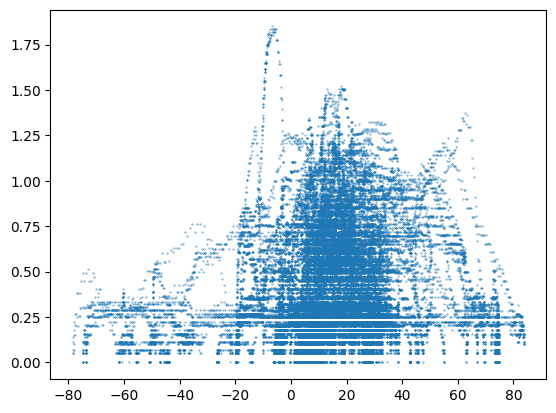

In [191]:
plt.scatter(ha_list,v_list, s= 0.1)

new approach?

In [22]:
# --> PROBLEM: calculates angle to the origin, not the previous frame
# calculates the angle in radians
theta = np.arctan2(y, x)
# converts the radian angle to degrees
degrees = np.degrees(theta)
degrees

array([93.6158787 , 93.57633437, 93.53625339, ..., 47.64595046,
       47.64595046, 47.64595046], shape=(76366,))

In [41]:
tuple_list = list(zip(x, y))
#tuple_list

In [44]:
numpy_tuple = np.array(tuple_list)
# numpy_tuple

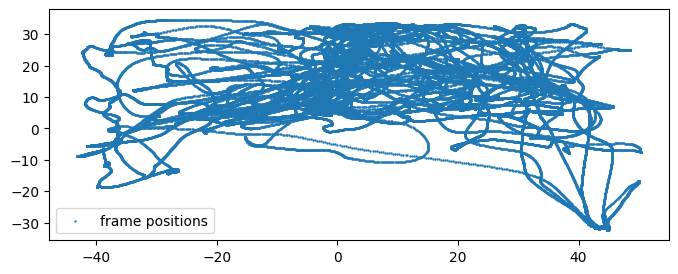

In [50]:
data = tuple_list

xy = np.array(data)

fig = plt.figure(figsize=(8,3))
ax = plt.gca()
X = np.linspace(0, 3, 100)
Y = np.linspace(3, 5, 100)
sc1 = ax.scatter(*xy.T, s=0.5)
plt.legend([sc1], ['frame positions'])
plt.show()